In [1]:
from expert.srl_graph import *

from matplotlib import pyplot as plt
import pandas as pd


%matplotlib inline

# Read in Data
One file with ARG0, VERB, and ARG1 from the SRL.  One file with ARG0 BERT embedding values. One file with ARG1 BERT embedding values.

In [2]:
srl_df = pd.read_csv('example_data/srl_file.csv')
srl_df.head()

,id,text,ARG0,ARG1,VERB
0,1,The quick brown fox jumped over the lazy dog,the quick brown fox,over the lazy dog,jumped
1,2,The little dog met the cute cat,the little dog,the cute cat,met
2,3,My cat knows the neighbor's fox,my cat,the neighbor's fox,knows
3,4,The quick dog walks with the lazy cat,the quick dog,with the lazy cat,walks
4,5,The dog and the cat play with the little fox,the dog and the cat,with the little fox,play


In [3]:
arg0_df = srl_df[['id','ARG0']].copy()
arg0_df.columns = ['id','arg']
arg0_df['arg_type'] = 'ARG0'
arg0_emb_df = pd.read_csv('example_data/arg0_embs.csv')
arg0_embs = [v for v in arg0_emb_df.values]
arg0_df['value'] = arg0_embs
arg0_df.head()

,id,arg,arg_type,value
0,1,the quick brown fox,ARG0,"[-2.242953062057495, -0.7982299327850342, -0.7..."
1,2,the little dog,ARG0,"[-1.6755774021148682, 1.1586612462997437, 0.28..."
2,3,my cat,ARG0,"[-0.2926557660102844, 1.6851425170898438, 1.37..."
3,4,the quick dog,ARG0,"[-1.5660264492034912, -0.4500308036804199, -0...."
4,5,the dog and the cat,ARG0,"[-1.76368510723114, 0.9016287922859192, -0.283..."


In [4]:
arg1_df = srl_df[['id','ARG1']].copy()
arg1_df.columns = ['id','arg']
arg1_df['arg_type'] = 'ARG1'
arg1_emb_df = pd.read_csv('example_data/arg1_embs.csv')
arg1_embs = [v for v in arg1_emb_df.values]
arg1_df['value'] = arg1_embs
arg1_df.head()

,id,arg,arg_type,value
0,1,over the lazy dog,ARG1,"[-0.749533474445343, 1.6587387323379517, 1.062..."
1,2,the cute cat,ARG1,"[-2.440173387527466, -0.1469210088253021, -0.1..."
2,3,the neighbor's fox,ARG1,"[-0.9404191970825196, -0.1318073719739914, -1...."
3,4,with the lazy cat,ARG1,"[-1.9357914924621584, -0.6872413158416748, 0.5..."
4,5,with the little fox,ARG1,"[-2.5996744632720947, -1.163606882095337, -0.2..."


In [5]:
#concatenate arg0 and arg1 values so that the node resolution can be performed across both
arg_df = pd.concat([arg0_df,arg1_df]).reset_index(drop=True)
arg_df

,id,arg,arg_type,value
0,1,the quick brown fox,ARG0,"[-2.242953062057495, -0.7982299327850342, -0.7..."
1,2,the little dog,ARG0,"[-1.6755774021148682, 1.1586612462997437, 0.28..."
2,3,my cat,ARG0,"[-0.2926557660102844, 1.6851425170898438, 1.37..."
3,4,the quick dog,ARG0,"[-1.5660264492034912, -0.4500308036804199, -0...."
4,5,the dog and the cat,ARG0,"[-1.76368510723114, 0.9016287922859192, -0.283..."
5,1,over the lazy dog,ARG1,"[-0.749533474445343, 1.6587387323379517, 1.062..."
6,2,the cute cat,ARG1,"[-2.440173387527466, -0.1469210088253021, -0.1..."
7,3,the neighbor's fox,ARG1,"[-0.9404191970825196, -0.1318073719739914, -1...."
8,4,with the lazy cat,ARG1,"[-1.9357914924621584, -0.6872413158416748, 0.5..."
9,5,with the little fox,ARG1,"[-2.5996744632720947, -1.163606882095337, -0.2..."


# Cluster BERT Embeddings to Resolve Nodes

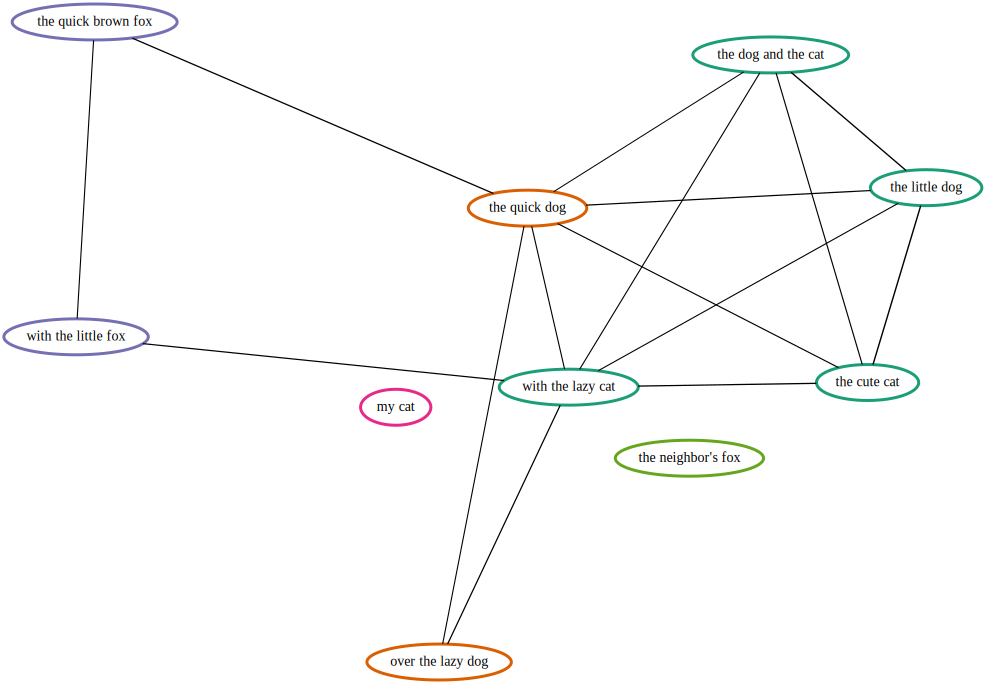

In [6]:
#construct network of nodes based on their BERT similarity
#play with threshold to optimize clustering
comms, sims = node_similarity_graph(arg_df,threshold=0.8,col='arg',plot=True)

In [7]:
#Print out each cluster (mean cluster similarity score, list of clustered nodes)
for sim,comm in [(s,x) for s, x in sorted(zip(sims,comms), key=lambda pair: pair[0])]:
        if len(comm) > 1:
            print(sim,arg_df.iloc[list(comm)]['arg'].unique())

0.8862283472913837 ['with the lazy cat' 'the little dog' 'the dog and the cat' 'the cute cat']
0.9095628241277384 ['the quick dog' 'over the lazy dog']
0.9114564176710598 ['the quick brown fox' 'with the little fox']


In [8]:
#select a single label for each cluster based on the frequency of the label options and their length
arg_df2 = replace_values(comms,sims,arg_df,full_df=arg_df,col='arg',thresh=0.8)
arg_df2

                 index  arg
0       the little dog    1
1  the dog and the cat    1
2    with the lazy cat    1
3         the cute cat    1
                 index  arg  len
3         the cute cat    1   12
0       the little dog    1   14
2    with the lazy cat    1   17
1  the dog and the cat    1   19
----------------------------------------
               index  arg
0      the quick dog    1
1  over the lazy dog    1
               index  arg  len
0      the quick dog    1   13
1  over the lazy dog    1   17
----------------------------------------
                 index  arg
0  the quick brown fox    1
1  with the little fox    1
                 index  arg  len
0  the quick brown fox    1   19
1  with the little fox    1   19
----------------------------------------
    index  arg
0  my cat    1
    index  arg  len
0  my cat    1    6
----------------------------------------
                index  arg
0  the neighbor's fox    1
                index  arg  len
0  the neighbor's fox

,id,arg,arg_type,value
1,2,the cute cat,ARG0,"[-1.6755774021148682, 1.1586612462997437, 0.28..."
4,5,the cute cat,ARG0,"[-1.76368510723114, 0.9016287922859192, -0.283..."
6,2,the cute cat,ARG1,"[-2.440173387527466, -0.1469210088253021, -0.1..."
8,4,the cute cat,ARG1,"[-1.9357914924621584, -0.6872413158416748, 0.5..."
3,4,the quick dog,ARG0,"[-1.5660264492034912, -0.4500308036804199, -0...."
5,1,the quick dog,ARG1,"[-0.749533474445343, 1.6587387323379517, 1.062..."
0,1,the quick brown fox,ARG0,"[-2.242953062057495, -0.7982299327850342, -0.7..."
9,5,the quick brown fox,ARG1,"[-2.5996744632720947, -1.163606882095337, -0.2..."
2,3,my cat,ARG0,"[-0.2926557660102844, 1.6851425170898438, 1.37..."
7,3,the neighbor's fox,ARG1,"[-0.9404191970825196, -0.1318073719739914, -1...."


In [9]:
#create dictionary of replacement values
replace_dict = arg_df.merge(arg_df2[['id','arg','arg_type']],
                             on=['id','arg_type'],
                            suffixes=('','_new'))[['arg','arg_new']].set_index('arg').to_dict()['arg_new']
replace_dict

{'the quick brown fox': 'the quick brown fox',
 'the little dog': 'the cute cat',
 'my cat': 'my cat',
 'the quick dog': 'the quick dog',
 'the dog and the cat': 'the cute cat',
 'over the lazy dog': 'the quick dog',
 'the cute cat': 'the cute cat',
 "the neighbor's fox": "the neighbor's fox",
 'with the lazy cat': 'the cute cat',
 'with the little fox': 'the quick brown fox'}

In [10]:
srl_df['ARG0'] = srl_df['ARG0'].map(replace_dict)
srl_df['ARG1'] = srl_df['ARG1'].map(replace_dict)

In [11]:
srl_df.head()

,id,text,ARG0,ARG1,VERB
0,1,The quick brown fox jumped over the lazy dog,the quick brown fox,the quick dog,jumped
1,2,The little dog met the cute cat,the cute cat,the cute cat,met
2,3,My cat knows the neighbor's fox,my cat,the neighbor's fox,knows
3,4,The quick dog walks with the lazy cat,the quick dog,the cute cat,walks
4,5,The dog and the cat play with the little fox,the cute cat,the quick brown fox,play


# Generate SRL graphs

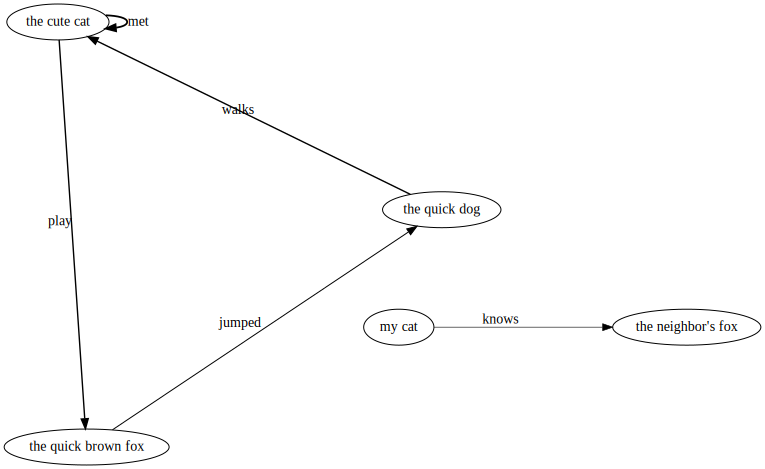

In [12]:
#unfiltered graph
graph_df,graph = generate_graph(srl_df, 'ARG0', 'ARG1', 'VERB', max_edge_weight=15.0,
                                edge_weight_filter=0.0,scale_vis_edge_weight=0.2,
                                upweight_by_node=True)
visualize(graph)

## Run heuristic for filtering edges

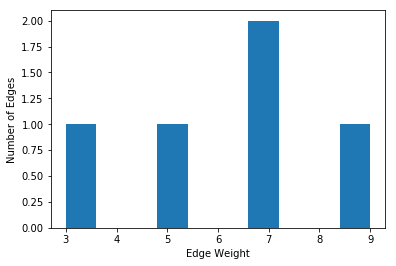

/Users/glen075/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/glen075/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/glen075/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


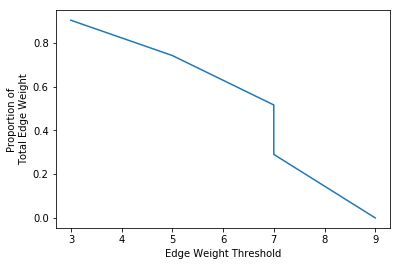

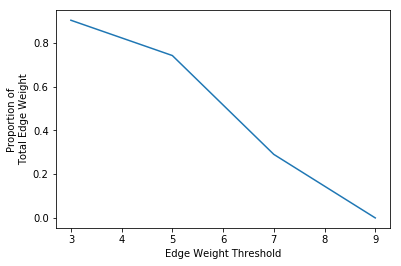

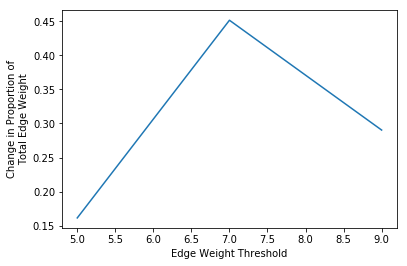

Empty DataFrame
Columns: [weight, cum_weight_prop, cum_weight_prop_diff, rel_cum_weight_prop_diff]
Index: []
7.0


In [13]:
thresh = explore_weights(graph_df)
print(thresh)

## Regenerate graph with edge weight filter  
You can also just play with the threshold manually

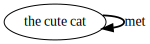

In [14]:
graph_df,graph = generate_graph(srl_df, 'ARG0', 'ARG1', 'VERB', max_edge_weight=15.0,
                                edge_weight_filter=thresh+1,scale_vis_edge_weight=0.2,upweight_by_node=True)
visualize(graph)